# Análise de Dados do banco de dados sintéticos

Autores: 
* Natanael Junior (natmourajr@lps.ufrj.br)
* Vinicius Mello  (viniciusdsmello@poli.ufrj.br)
* Pedro Lisboa (pedrohblisboa@gmail.com)

LPS - Laboratório de Processamento de Sinais
<center><img src="../data/logo_lps.jpg"></center>

### Carrega algumas bibliotecas de Python

Imprime um resumo de quanto tempo demorou para rodar a célula em questão
```python
%time
```

Carrega a biblioteca do sistema operacional
```python
import os
```

Carrega a biblioteca de computação numérica do python
```python
import numpy as np
```

Carrega a biblioteca Pandas (https://pandas.pydata.org), ótima ferramenta de análise de dados
```python
import pandas as pd
```

Carrega uma biblioteca MatplotLib (https://matplotlib.org), ótima ferramenta para a criação de gráficos
```python
import matplotlib.pyplot as plt
```

In [1]:
%time
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.53 µs


### Geração de dados sintéticos

In [2]:
%time
# Create Data
n_events = 10000

m_mean = 0.0
m_var = 1.0

df = pd.DataFrame(m_var*np.random.randn(n_events,1)+m_mean, columns=['va1']);

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


In [3]:
df.head()

,va1
0,-1.384997
1,0.912528
2,-0.067946
3,1.321949
4,-1.604718


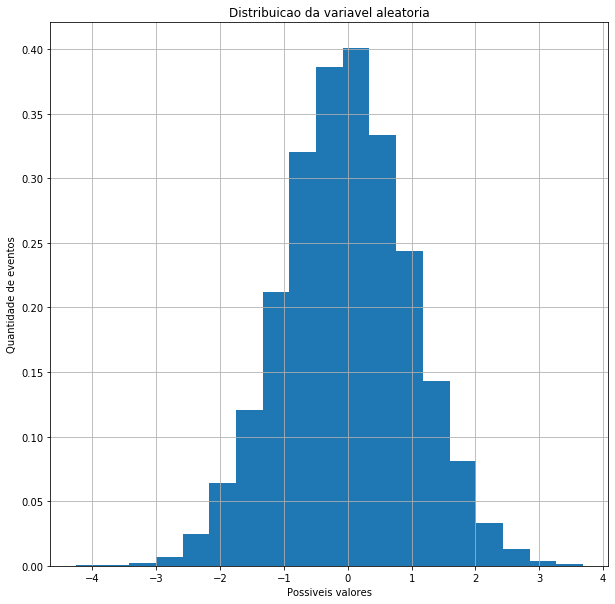

In [4]:
fig = plt.figure(figsize=(10,10))

n_bins = 20
ax = plt.subplot(1,1,1)
bins = np.linspace(df['va1'].values.min(),df['va1'].values.max(),n_bins)
n, bins, patches = ax.hist(df['va1'].values,bins=bins, density=True)
ax.set_title('Distribuicao da variavel aleatoria')
ax.set_ylabel('Quantidade de eventos')
ax.set_xlabel('Possiveis valores')
ax.grid()

In [5]:
print('Media da Variavel Aleatoria: %1.4f'%(df['va1'].values.mean()))
print('Variancia da Variavel Aleatoria: %1.4f'%(df['va1'].values.var()))
print('Desvio padrao da Variavel Aleatoria: %1.4f'%(df['va1'].values.std()))

Media da Variavel Aleatoria: -0.0123
Variancia da Variavel Aleatoria: 0.9893
Desvio padrao da Variavel Aleatoria: 0.9946


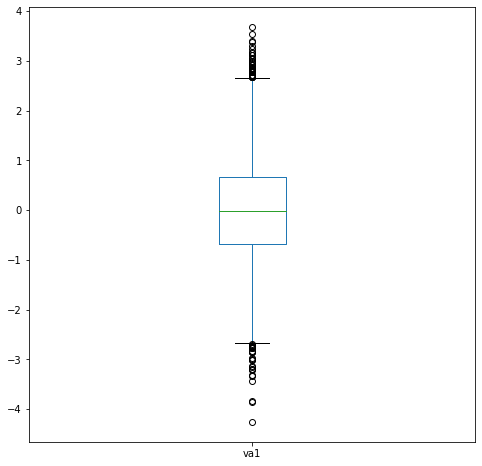

In [6]:
df['va1'].plot.box(figsize=(8,8));

### Geração de dados sintéticos com outra distribuição

In [7]:
df['va2'] = np.random.uniform(-1, 1, n_events)

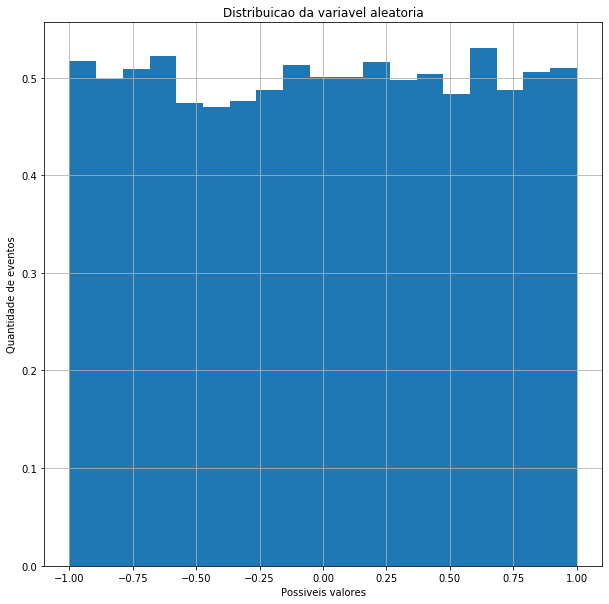

In [8]:
fig = plt.figure(figsize=(10,10))

n_bins = 20
ax = plt.subplot(1,1,1)
bins = np.linspace(df['va2'].values.min(),df['va2'].values.max(),n_bins)
n, bins, patches = ax.hist(df['va2'].values,bins=bins, density=True)
ax.set_title('Distribuicao da variavel aleatoria')
ax.set_ylabel('Quantidade de eventos')
ax.set_xlabel('Possiveis valores')
ax.grid()

In [9]:
print('Media da Variavel Aleatoria: %1.4f'%(df['va2'].values.mean()))
print('Variancia da Variavel Aleatoria: %1.4f'%(df['va2'].values.var()))
print('Desvio padrao da Variavel Aleatoria: %1.4f'%(df['va2'].values.std()))

Media da Variavel Aleatoria: 0.0021
Variancia da Variavel Aleatoria: 0.3366
Desvio padrao da Variavel Aleatoria: 0.5802


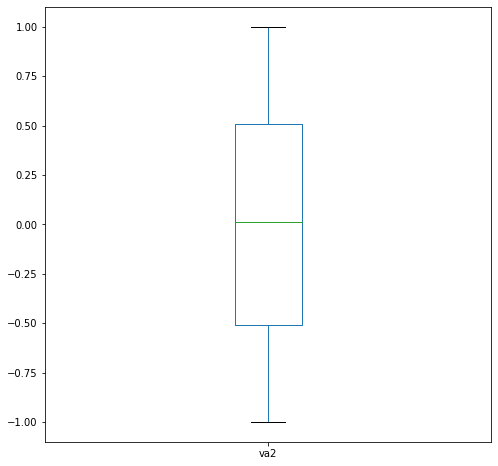

In [10]:
df['va2'].plot.box(figsize=(8,8));

### Geração de dados dependendes

In [11]:
df['va3'] = 2*df['va2'].values

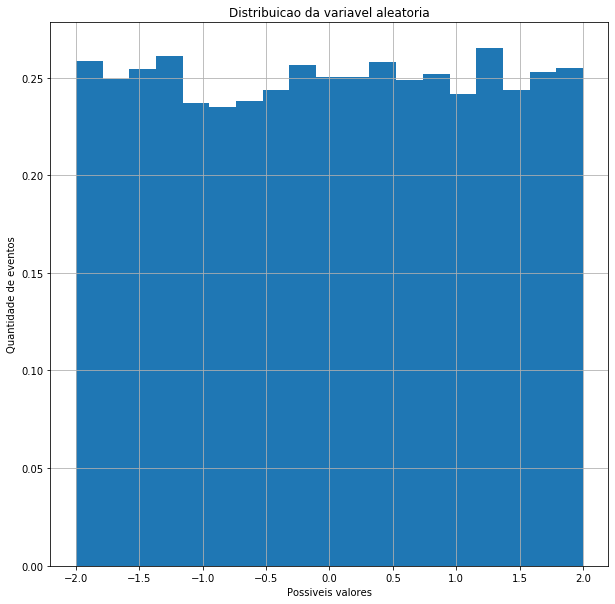

In [12]:
fig = plt.figure(figsize=(10,10))

n_bins = 20
ax = plt.subplot(1,1,1)
bins = np.linspace(df['va3'].values.min(),df['va3'].values.max(),n_bins)
n, bins, patches = ax.hist(df['va3'].values,bins=bins, density=True)
ax.set_title('Distribuicao da variavel aleatoria')
ax.set_ylabel('Quantidade de eventos')
ax.set_xlabel('Possiveis valores')
ax.grid()

In [13]:
print('Media da Variavel Aleatoria: %1.4f'%(df['va3'].values.mean()))
print('Variancia da Variavel Aleatoria: %1.4f'%(df['va3'].values.var()))
print('Desvio padrao da Variavel Aleatoria: %1.4f'%(df['va3'].values.std()))

Media da Variavel Aleatoria: 0.0042
Variancia da Variavel Aleatoria: 1.3465
Desvio padrao da Variavel Aleatoria: 1.1604


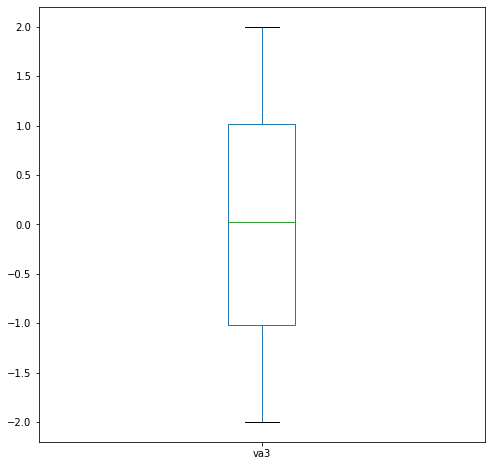

In [14]:
df['va3'].plot.box(figsize=(8,8));

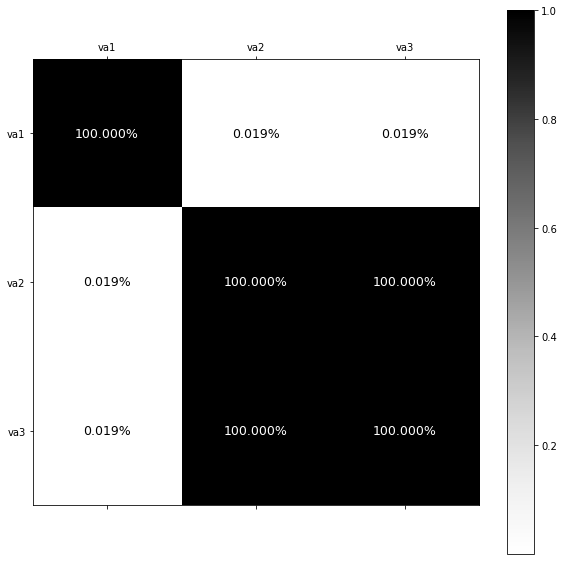

In [15]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.matshow(corr, cmap=plt.cm.Greys)

plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

# Loop over data dimensions and create text annotations.
for i in range(corr.shape[1]):
    for j in range(corr.shape[0]):
        if corr.values[i,j] < 0.5:
            ax.annotate('%1.3f%%'%(100.*corr.values[i,j]), xy=(j, i),
                        horizontalalignment='center',
                        verticalalignment='center', fontsize=12.5)
        else:
            ax.annotate('%1.3f%%'%(100.*corr.values[i,j]), xy=(j, i),
                        horizontalalignment='center',
                        verticalalignment='center', fontsize=12.5, color='white')
                
        #text = ax.text(j, i, corr.values[i, j],ha="center", va="center", color="w")
fig.colorbar(im)

In [16]:
df['va4'] = 100.*np.random.randn(n_events,1)+400.

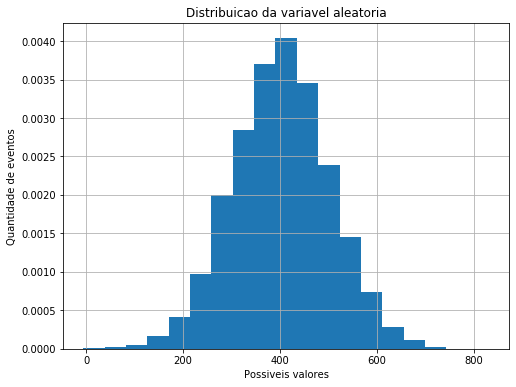

In [17]:
fig = plt.figure(figsize=(8,6))

n_bins = 20
ax = plt.subplot(1,1,1)
bins = np.linspace(df['va4'].values.min(),df['va4'].values.max(),n_bins)
n, bins, patches = ax.hist(df['va4'].values,bins=bins, density=True)
ax.set_title('Distribuicao da variavel aleatoria')
ax.set_ylabel('Quantidade de eventos')
ax.set_xlabel('Possiveis valores')
ax.grid()

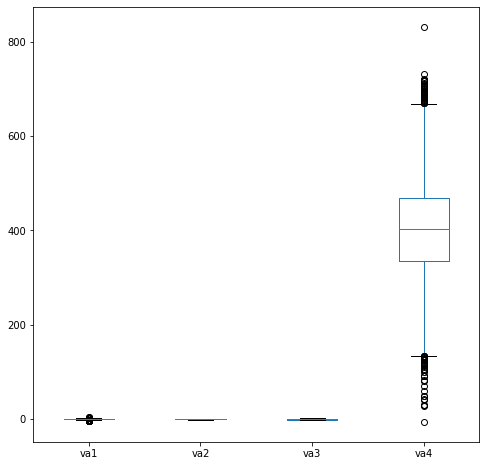

In [18]:
df.plot.box(figsize=(8,8));

A variável acima encontra-se com valores aleatórios muito grandes, quando comparados com as variáveis aleatórias anteriores. A proposta é colocar todas as variáveis na mesma escala para uma possível comparação entre elas.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['va1','va2','va3','va4']])


df_norm = pd.DataFrame(scaler.transform(df),columns=['va1','va2','va3','va4'])

In [20]:
df_norm.head()

,va1,va2,va3,va4
0,-1.380141,0.880728,0.880728,-1.295099
1,0.929834,0.940461,0.940461,0.438508
2,-0.055953,-0.367067,-0.367067,-0.417365
3,1.341473,-0.155961,-0.155961,0.029229
4,-1.601052,-0.590355,-0.590355,-0.970371


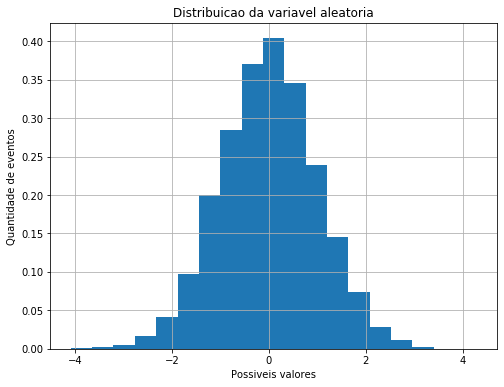

In [21]:
fig = plt.figure(figsize=(8,6))

n_bins = 20
ax = plt.subplot(1,1,1)
bins = np.linspace(df_norm['va4'].values.min(),df_norm['va4'].values.max(),n_bins)
n, bins, patches = ax.hist(df_norm['va4'].values,bins=bins, density=True)
ax.set_title('Distribuicao da variavel aleatoria')
ax.set_ylabel('Quantidade de eventos')
ax.set_xlabel('Possiveis valores')
ax.grid()

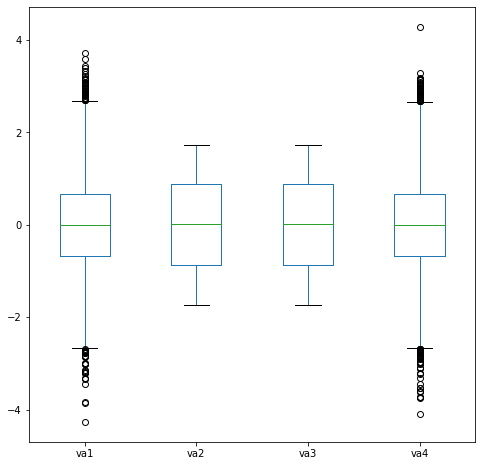

In [22]:
df_norm.plot.box(figsize=(8,8));

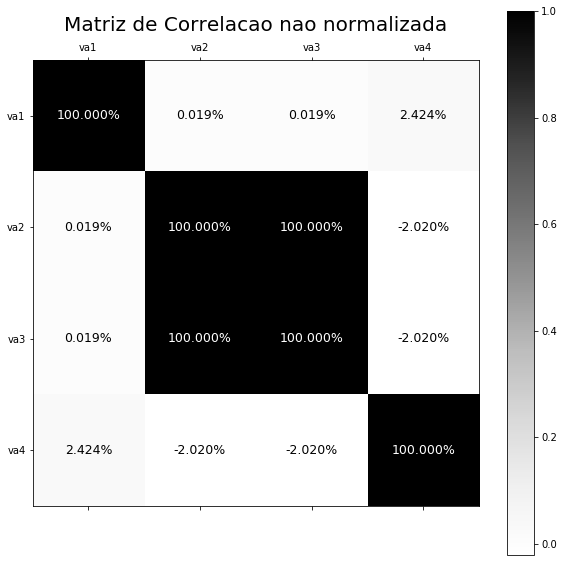

In [23]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.matshow(corr, cmap=plt.cm.Greys)

plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

# Loop over data dimensions and create text annotations.
for i in range(corr.shape[1]):
    for j in range(corr.shape[0]):
        if corr.values[i,j] < 0.5:
            ax.annotate('%1.3f%%'%(100.*corr.values[i,j]), xy=(j, i),
                        horizontalalignment='center',
                        verticalalignment='center', fontsize=12.5)
        else:
            ax.annotate('%1.3f%%'%(100.*corr.values[i,j]), xy=(j, i),
                        horizontalalignment='center',
                        verticalalignment='center', fontsize=12.5, color='white')
                
        #text = ax.text(j, i, corr.values[i, j],ha="center", va="center", color="w")
        ax.set_title('Matriz de Correlacao nao normalizada', fontsize=20)
fig.colorbar(im)

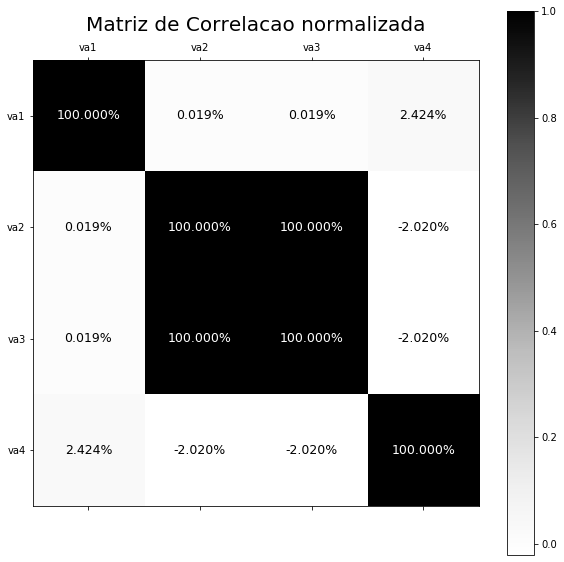

In [24]:
corr = df_norm.corr()

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.matshow(corr, cmap=plt.cm.Greys)

plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

# Loop over data dimensions and create text annotations.
for i in range(corr.shape[1]):
    for j in range(corr.shape[0]):
        if corr.values[i,j] < 0.5:
            ax.annotate('%1.3f%%'%(100.*corr.values[i,j]), xy=(j, i),
                        horizontalalignment='center',
                        verticalalignment='center', fontsize=12.5)
        else:
            ax.annotate('%1.3f%%'%(100.*corr.values[i,j]), xy=(j, i),
                        horizontalalignment='center',
                        verticalalignment='center', fontsize=12.5, color='white')
                
        #text = ax.text(j, i, corr.values[i, j],ha="center", va="center", color="w")
        ax.set_title('Matriz de Correlacao normalizada', fontsize=20)
fig.colorbar(im)


Agora, vou criar um conjunto de dados sintéticos que é linearmente separável mas que não está bem representado

In [25]:
%time
n_events = 1000

# dados em 45^o
angle = np.pi/6
rotation_matrix = [[np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)]]

m_means = [-0.2,0.2]
m_vars = [0.5,0.05]

data_c1 = m_vars*np.random.randn(n_events,2)+m_means
data_c1 = np.inner(data_c1,rotation_matrix)

m_means = [0.2,-0.2]
m_vars = [0.5,0.05]

data_c2 = m_vars*np.random.randn(n_events,2)+m_means
data_c2 = np.inner(data_c2,rotation_matrix)

data = np.append(data_c1, data_c2,axis=0)
trgt = np.append(np.zeros(data_c1.shape[0]),np.ones(data_c2.shape[0]),axis=0)

df1 = pd.DataFrame()
df1['x1'] = data[:,0]
df1['x2'] = data[:,1]
df1['class'] = trgt

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


In [26]:
df1.head(10)

,x1,x2,class
0,-0.774811,-0.229411,0.0
1,-0.306969,0.023239,0.0
2,-0.296841,0.133406,0.0
3,-0.570927,-0.137012,0.0
4,-0.206421,0.145834,0.0
5,-1.335611,-0.538141,0.0
6,-0.667168,-0.130528,0.0
7,-1.163837,-0.474646,0.0
8,-0.855124,-0.297879,0.0
9,0.058171,0.190672,0.0


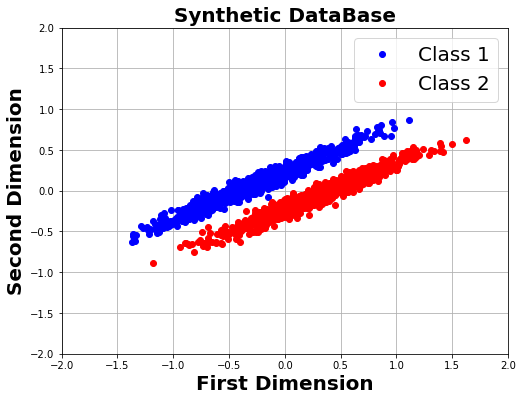

In [27]:
# plot data
%matplotlib inline  

fig = plt.figure(figsize=(8,6))

plt.plot(df1[df1['class']==0.]['x1'],df1[df1['class']==0.]['x2'],'bo',label='Class 1')
plt.plot(df1[df1['class']==1.]['x1'],df1[df1['class']==1.]['x2'],'ro',label='Class 2')

plt.legend()
plt.grid()
plt.title('Synthetic DataBase',fontweight='bold',fontsize=20)
plt.xlabel('First Dimension',fontweight='bold',fontsize=20)
plt.ylabel('Second Dimension',fontweight='bold',fontsize=20)
limits = [-2, 2]
plt.xlim(limits)
plt.ylim(limits)
plt.legend(fontsize=20)

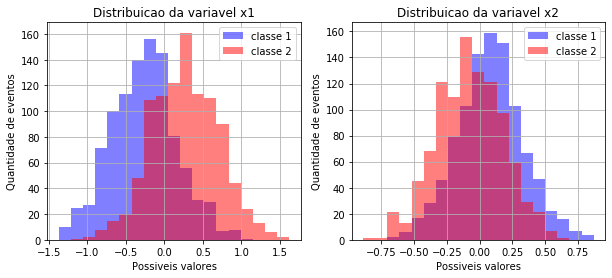

In [28]:
fig = plt.figure(figsize=(10,4))

data = df1.drop(['class'],axis=1)


m_colors = ['b','r']
class_labels = ['classe 1','classe 2']

n_bins = 20

for idx, feature in enumerate(data.columns):
    ax = plt.subplot(1,2,idx+1)
    bins = np.linspace(data[feature].min(),data[feature].max(),n_bins)
    for idy,iclass in enumerate(np.unique(df1['class'])):
        n, bins, patches = ax.hist(data[df1['class']==iclass][feature],bins=bins, 
                                   color=m_colors[idy], alpha=0.5,label=class_labels[idy])
    ax.set_title('Distribuicao da variavel %s'%(feature.replace('_',' ')))
    ax.set_ylabel('Quantidade de eventos')
    ax.set_xlabel('Possiveis valores')
    ax.grid()
    ax.legend()

Agora vamos tentar encontrar as direções de maior energia para extração dos PCA

In [29]:
from sklearn.decomposition import PCA

data = df1.drop(['class'],axis=1)

pca = PCA(n_components=2)
pca.fit(data)

pca.transform(data)

df_pca = pd.DataFrame(pca.transform(data),columns=['x1','x2'])
df_pca['class'] = trgt

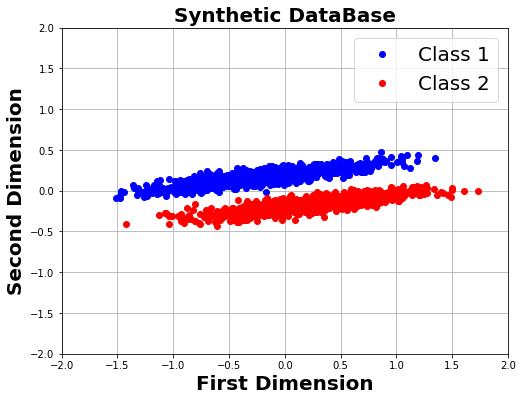

In [30]:
# plot data
%matplotlib inline  

fig = plt.figure(figsize=(8,6))

plt.plot(df_pca[df_pca['class']==0.]['x1'],df_pca[df_pca['class']==0.]['x2'],'bo',label='Class 1')
plt.plot(df_pca[df_pca['class']==1.]['x1'],df_pca[df_pca['class']==1.]['x2'],'ro',label='Class 2')

plt.legend()
plt.grid()
plt.title('Synthetic DataBase',fontweight='bold',fontsize=20)
plt.xlabel('First Dimension',fontweight='bold',fontsize=20)
plt.ylabel('Second Dimension',fontweight='bold',fontsize=20)
limits = [-2, 2]
plt.xlim(limits)
plt.ylim(limits)
plt.legend(fontsize=20)

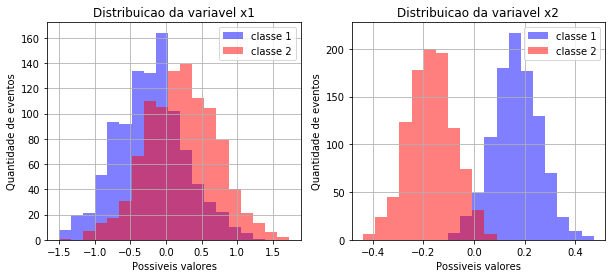

In [31]:
fig = plt.figure(figsize=(10,4))

data = df_pca.drop(['class'],axis=1)


m_colors = ['b','r']
class_labels = ['classe 1','classe 2']

n_bins = 20

for idx, feature in enumerate(data.columns):
    ax = plt.subplot(1,2,idx+1)
    bins = np.linspace(data[feature].min(),data[feature].max(),n_bins)
    for idy,iclass in enumerate(np.unique(df_pca['class'])):
        n, bins, patches = ax.hist(data[df_pca['class']==iclass][feature],bins=bins, 
                                   color=m_colors[idy], alpha=0.5,label=class_labels[idy])
    ax.set_title('Distribuicao da variavel %s'%(feature.replace('_',' ')))
    ax.set_ylabel('Quantidade de eventos')
    ax.set_xlabel('Possiveis valores')
    ax.grid()
    ax.legend()